In [1]:
%matplotlib inline
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Matrix library
import numpy as np
# Scikit-learn
from sklearn.prepr

In [4]:
%run utilities.py

In [3]:
x, y = load_matlab_data('hwkdataNEW.mat')

Split the data into **training**, **test**, **validation**

In [8]:
np.min(x, axis=0)

array([  22. ,  125. ,   64. ,   19.1,   31.1,   83.4,   70.4,   85.3,
         49.3,   33. ,   19.1,   24.8,   21. ,   15.8])

In [7]:
x.shape

(247, 14)

In [18]:
np.corrcoef(x.T).shape

(14, 14)

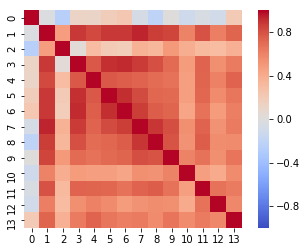

In [23]:
sns.heatmap(np.corrcoef(x.T), vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True)

Pipeline should:
- Do some kind of cross_validation split with one fold
- Scale the data
- Do the PCA
- Filter the loadings via each of some functions I write
- Perform regression against the loadings
- Spit out the testing score of the model